In [1]:
%cd ..

/home/hoanghu/projects/Food-Waste-Optimization


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [3]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

## File: tuntidata.xlsx

Store the quantity of something in all 3 restaurants in different datetimes

In [4]:
path = "src/data/basic_mvp_data/tuntidata.xlsx"

df = pd.read_excel(path, header=0)

df.head(30)

,Unnamed: 0,Ravintola,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,600 Chemicum,610 Physicum,620 Exactum,All groups
1,Date,249134,119756,75064,443954
2,2.1.2023,272,NaN,NaN,272
3,8,1,NaN,NaN,1
4,10,18,NaN,NaN,18
5,11,83,NaN,NaN,83
6,12,79,NaN,NaN,79
7,13,90,NaN,NaN,90
8,14,1,NaN,NaN,1
9,3.1.2023,327,NaN,NaN,327


## File: tuntidata2.xlsx

Store the number of orders in hours from 8 to 14 in different restaurants in different dates.

This file is just a processed version from `tuntidata.xlsx`

In [4]:
path = "src/data/basic_mvp_data/tuntidata2.xlsx"

df2 = pd.read_excel(path, header=0)

df2.head()

,Date,Kuitin tunti,Ravintola,Kuitti kpl
0,2023-01-02,8,600 Chemicum,1
1,2023-01-02,10,600 Chemicum,18
2,2023-01-02,11,600 Chemicum,83
3,2023-01-02,12,600 Chemicum,79
4,2023-01-02,13,600 Chemicum,90


In [5]:
restaurant = "600 Chemicum"
date = "2023-01-02"

df_chemicum_date = df2[
    (df2['Date'] == pd.to_datetime(date)) & 
    (df2['Ravintola'] == restaurant)
]

df_chemicum_date

,Date,Kuitin tunti,Ravintola,Kuitti kpl
0,2023-01-02,8,600 Chemicum,1
1,2023-01-02,10,600 Chemicum,18
2,2023-01-02,11,600 Chemicum,83
3,2023-01-02,12,600 Chemicum,79
4,2023-01-02,13,600 Chemicum,90
5,2023-01-02,14,600 Chemicum,1


In [6]:
df_chemicum_date['Kuitti kpl'].sum()

np.int64(272)

## File: supersight-raw_data.csv

Store the number of customers going in/out in different locations in different datetimes

In [51]:
path = "src/data/basic_mvp_data/supersight-raw-data.csv"

df = pd.read_csv(path, header=0, index_col=0)

df.head()

,dateCreated,countIn,countOut,phoneName
0,2024-03-15T04:26:15.000Z,0,1,S63
1,2024-03-15T04:26:24.000Z,1,2,S63
2,2024-03-15T04:26:27.000Z,1,0,S63
3,2024-03-15T05:19:19.000Z,1,0,S63
4,2024-03-15T05:37:09.000Z,1,0,S63


In [7]:
col_dt = pd.to_datetime(df['dateCreated'])

df.loc[:, 'day'] = col_dt.dt.day
df.loc[:, 'month'] = col_dt.dt.month
df.loc[:, 'hour'] = col_dt.dt.hour
df.loc[:, 'weekday'] = col_dt.dt.weekday

df.head()

,dateCreated,countIn,countOut,phoneName,day,month,hour,weekday
0,2024-03-15T04:26:15.000Z,0,1,S63,15,3,4,4
1,2024-03-15T04:26:24.000Z,1,2,S63,15,3,4,4
2,2024-03-15T04:26:27.000Z,1,0,S63,15,3,4,4
3,2024-03-15T05:19:19.000Z,1,0,S63,15,3,5,4
4,2024-03-15T05:37:09.000Z,1,0,S63,15,3,5,4


In [8]:
df_by_multiple = df.groupby(['day', 'month', 'hour', 'phoneName', 'weekday'])[['countIn', 'countOut']].sum().reset_index()
df_by_multiple.head()

,day,month,hour,phoneName,weekday,countIn,countOut
0,1,4,7,S63,0,1,0
1,1,4,8,S82,0,1,0
2,1,4,9,S113,0,1,0
3,1,4,9,S63,0,0,1
4,1,4,9,S82,0,0,1


In [9]:
def view_by(df: pd.DataFrame, by: str):
    assert by in df

    cols = [by, 'countIn', 'countOut']
    df_by = df_by_multiple[cols].groupby(by).sum().reset_index()

    df_by = pd.melt(df_by, id_vars=[by], value_vars=['countIn', 'countOut'], var_name='type', value_name='count')

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)

    sns.barplot(df_by, x=by, y='count', hue='type', ax=ax)


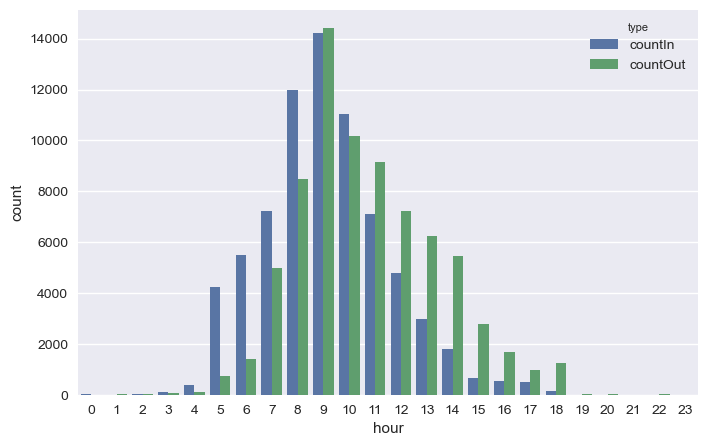

In [10]:
view_by(df_by_multiple, 'hour')

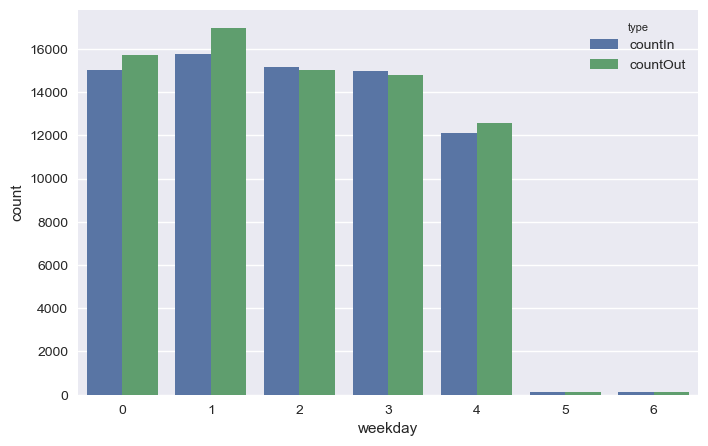

In [11]:
view_by(df_by_multiple, 'weekday')

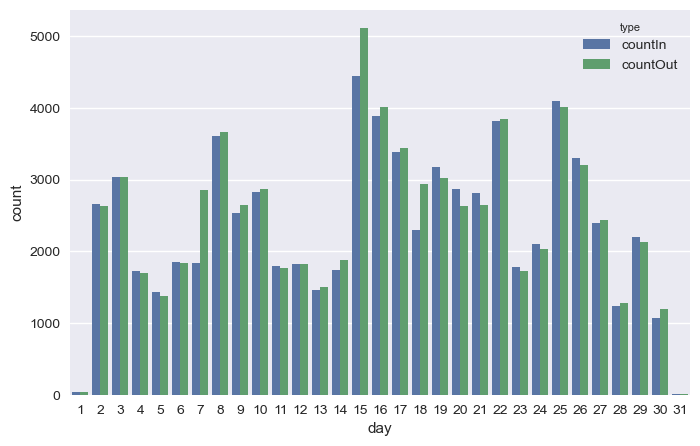

In [12]:
view_by(df_by_multiple, 'day')

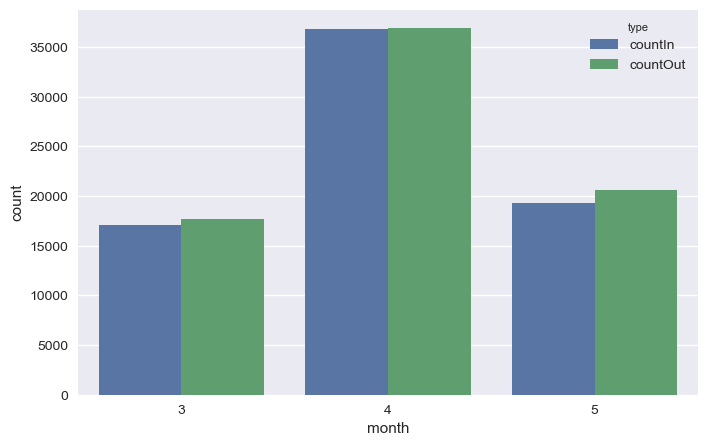

In [13]:
view_by(df_by_multiple, 'month')

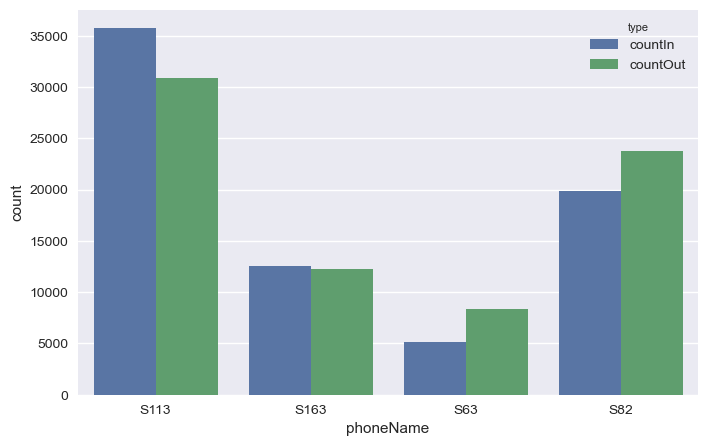

In [14]:
view_by(df_by_multiple, 'phoneName')

## File: kumpula_data.xlsx

Store the quantity of something in 3 restaurants in different dates

In [15]:
path = "src/data/basic_mvp_data/kumpula_data.xlsx"

df = pd.read_excel(path, header=0)

df.head()

,Unnamed: 0,Ravintola,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,600 Chemicum,610 Physicum,620 Exactum,All groups
1,Date,36456,7460,11245,55161
2,1.3.2024,807,132,415,1354
3,4.3.2024,1026,150,NaN,1176
4,5.3.2024,984,175,NaN,1159


In [26]:
path = "src/data/basic_mvp_data/kumpula_lounaat_kat.csv"

df = pd.read_csv(path, delimiter=';')

df.head(20)

,Unnamed: 0,Ravintola,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,600 Chemicum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total
1,NaN,Kala,%-osuus,Kana,%-osuus,Kasvis,%-osuus,Liha,%-osuus,Not Mapped,...,Kasvis,%-osuus,Liha,%-osuus,Not Mapped,%-osuus,Vegaani,%-osuus,Total,NaN
2,NaN,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,...,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,NaN,Lounaat ilman lisämyyntiä,Lounaat ilman lisämyyntiä
3,Total,73 554,"26,4 %",47 233,"16,9 %",1 524,"0,5 %",41 839,"15,0 %",14 822,...,3 910,"5,3 %",7 744,"10,6 %",195,"0,3 %",31 626,"43,2 %",73 132,397 770
4,2023-01-02,85,"24,4 %",0,"0,0 %",0,"0,0 %",171,"49,1 %",1,...,0,"0,0 %",0,"0,0 %",0,"0,0 %",0,"0,0 %",0,348
5,2023-01-03,163,"41,4 %",0,"0,0 %",32,"8,1 %",78,"19,8 %",1,...,0,"0,0 %",0,"0,0 %",0,"0,0 %",0,"0,0 %",0,394
6,2023-01-04,70,"16,4 %",0,"0,0 %",0,"0,0 %",218,"50,9 %",3,...,0,"0,0 %",0,"0,0 %",0,"0,0 %",0,"0,0 %",0,428
7,2023-01-05,232,"46,3 %",85,"17,0 %",0,"0,0 %",2,"0,4 %",4,...,0,"0,0 %",0,"0,0 %",0,"0,0 %",0,"0,0 %",0,501
8,2023-01-09,107,"18,5 %",0,"0,0 %",0,"0,0 %",264,"45,7 %",0,...,0,"0,0 %",0,"0,0 %",0,"0,0 %",50,"50,5 %",99,710
9,2023-01-10,241,"45,9 %",0,"0,0 %",77,"14,7 %",33,"6,3 %",0,...,15,"7,2 %",0,"0,0 %",0,"0,0 %",77,"37,2 %",207,785


## File: Sold lunches.csv

In [6]:
path = "src/data/basic_mvp_data/Sold lunches.csv"

df = pd.read_csv(path, delimiter=';')

df.head()

/tmp/ipykernel_43703/1730505476.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, delimiter=';')


,Date,Receipt time,Restaurant,Food Category,Dish,pcs,Hiilijalanjälki
0,2.1.2023,10:31,600 Chemicum,Liha,"Uunimakkaraa,sinappikastiketta",1,"0,9"
1,2.1.2023,10:32,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
2,2.1.2023,10:32,600 Chemicum,Liha,"Uunimakkaraa,sinappikastiketta",1,"0,9"
3,2.1.2023,10:35,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
4,2.1.2023,10:36,600 Chemicum,Liha,"Uunimakkaraa,sinappikastiketta",2,"1,8"


In [9]:
restaurant = "600 Chemicum"
date = "2.1.2023"

df_chemicum_date = df[
    (df['Date'] == date)
    & (df['Restaurant'] == restaurant)
    & (df['Food Category'] == 'Kala')
]

df_chemicum_date

,Date,Receipt time,Restaurant,Food Category,Dish,pcs,Hiilijalanjälki
1,2.1.2023,10:32,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
3,2.1.2023,10:35,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
5,2.1.2023,10:37,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
11,2.1.2023,10:44,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
13,2.1.2023,10:51,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
...,...,...,...,...,...,...,...
191,2.1.2023,13:36,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
196,2.1.2023,13:41,600 Chemicum,Kala,"Kala, Take away",1,"0,77"
204,2.1.2023,13:49,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"
206,2.1.2023,13:50,600 Chemicum,Kala,Kalapuikot tillikermaviilikast,1,"1,04"


In [10]:
df_chemicum_date['pcs'].astype(np.int32).sum()

np.int64(85)

In [41]:
df_chemicum_date['Hiilijalanjälki'].apply(func=lambda x: x.replace(',', '.')).astype(np.float32).sum()

np.float32(86.509995)

## File: Biowaste.csv

In [48]:
path = "src/data/basic_mvp_data/Biowaste.csv"

df = pd.read_csv(path, delimiter=';')

df.head()

,Date,Ravintola,Asiakasbiojäte. tiski (kg),Biojäte kahvi. porot (kg),Keittiön biojäte (ruoanvalmistus) (kg),Salin biojäte (jämät) (kg)
0,1.1.2023,600 Chemicum,0.0,0.0,0.0,0.0
1,1.1.2023,610 Physicum,0.0,0.0,0.0,0.0
2,1.1.2023,620 Exactum,0.0,0.0,0.0,0.0
3,2.1.2023,600 Chemicum,4.7,1.2,12.0,0.0
4,2.1.2023,610 Physicum,0.0,0.0,0.0,0.0


## File: kumpula_menu.csv

In [50]:
path = "src/data/basic_mvp_data/kumpula_menu.csv"

df = pd.read_csv(path, delimiter=';')

df.head(30)

,Unnamed: 0,Ravintola,Unnamed: 2,Unnamed: 3,Unnamed: 4,Ravintola.1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Ravintola.2,Unnamed: 10
0,NaN,600 Chemicum,Total,NaN,NaN,610 Physicum,Total,NaN,NaN,620 Exactum,Total
1,NaN,Myydyt tuotteet kpl,Myydyt tuotteet kpl,NaN,NaN,Myydyt tuotteet kpl,Myydyt tuotteet kpl,NaN,NaN,Myydyt tuotteet kpl,Myydyt tuotteet kpl
2,Total,95 784,95 784,NaN,Total,13 929,13 929,NaN,Total,25 135,25 135
3,2023-01-02,347,347,NaN,2023-01-09,33,33,NaN,2023-01-09,99,99
4,"Liha, take away",6,6,NaN,"Lounaspatonki, juusto",4,4,NaN,"Kala, Take away",4,4
5,"Kala, Take away",7,7,NaN,"Panini, Kana",4,4,NaN,"Vegaani, Take away",3,3
6,"Vegaani, Take away",7,7,NaN,"Panini, Mozzarella",7,7,NaN,"Kasvisjauhispyörykät,tomaattik",47,47
7,Marokkolainen linssipata,84,84,NaN,"Panini, BBQ kana-pekoni",8,8,NaN,Lohimurekepihvit ja herne-piparjuurikastike,45,45
8,"Uunimakkaraa,sinappikastiketta",165,165,NaN,Broileri-nacho-salaattia,3,3,NaN,2023-01-10,207,207
9,Kalapuikot tillikermaviilikast,78,78,NaN,"Lounaspatonki, vegejuusto",1,1,NaN,"Kana, Take away",2,2
